In [52]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from umap import UMAP                                         # pip install umap-learn
from hdbscan import HDBSCAN                                   # pip install hdbscan
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Acquisition

In [53]:
data = tf.keras.datasets.mnist.load_data()

In [54]:
f = open('mnist.data', 'wb')
pickle.dump(data, f)
f.close()

In [55]:
!ls -al

total 68456
drwxr-xr-x  3 chyld chyld     4096 Jan 11 23:06 .
drwxr-xr-x 31 chyld chyld     4096 Jan 10 10:24 ..
-rw-r--r--  1 chyld chyld   457524 Jan 11 23:06 advanced-clustering.ipynb
-rw-r--r--  1 chyld chyld     7228 Jan 11 17:04 cluster-comparision.ipynb
-rw-r--r--  1 chyld chyld  3062676 Jan 10 10:24 clustering.pdf
drwxr-xr-x  2 chyld chyld     4096 Jan 11 18:04 .ipynb_checkpoints
-rw-r--r--  1 chyld chyld 54950296 Jan 11 23:06 mnist.data
-rw-r--r--  1 chyld chyld 11598266 Jan 11 18:01 mnist.zip
-rw-r--r--  1 chyld chyld       13 Jan 10 10:24 readme.md


In [56]:
f = open('mnist.data', 'rb')
(X_train, y_train), (X_test, y_test) = pickle.load(f)
f.close()

In [57]:
X_train.shape

(60000, 28, 28)

In [58]:
n = 5000
X_train = X_train[:n]
y_train = y_train[:n]

In [59]:
X_train.shape

(5000, 28, 28)

# View Sample

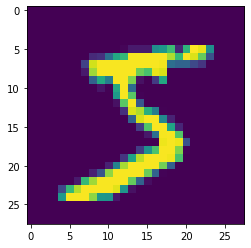

In [60]:
plt.imshow(X_train[0]);

In [61]:
y_train[0]

5

# Reshape

In [62]:
X_flat = X_train.reshape(-1, 784)
X_flat.shape

(5000, 784)

In [63]:
X_flat.min(), X_flat.max()

(0, 255)

# Normalize

In [64]:
X_flat_normalized = X_flat / 255
X_flat_normalized.min(), X_flat_normalized.max()

(0.0, 1.0)

# PCA

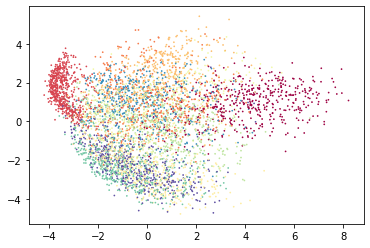

In [158]:
pca = PCA(n_components=2).fit_transform(X_flat_normalized)
plt.scatter(*pca.T, c=y_train, s=0.5, cmap='Spectral');

# TSNE

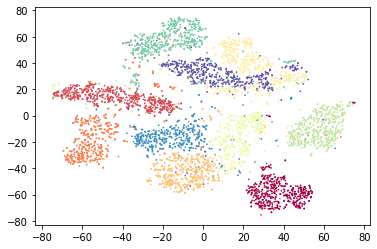

In [157]:
tsne = TSNE(n_components=2).fit_transform(X_flat_normalized)
plt.scatter(*tsne.T, c=y_train, s=0.5, cmap='Spectral');

# UMAP

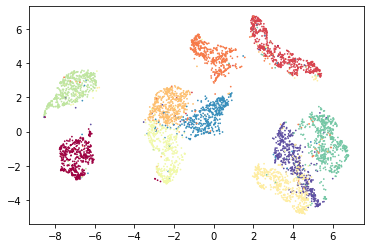

In [156]:
umap = UMAP(n_components=2).fit_transform(X_flat_normalized)
plt.scatter(*umap.T, c=y_train, s=0.5, cmap='Spectral');

# KMeans

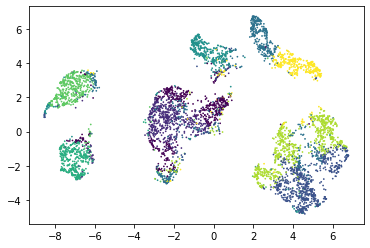

In [162]:
km = KMeans(n_clusters=9).fit(X_flat_normalized)
plt.scatter(*umap.T, c=km.labels_, s=0.5);

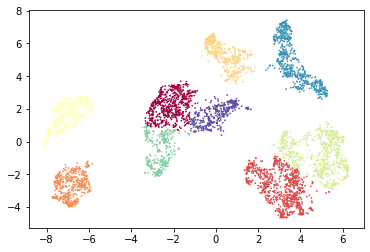

In [153]:
km = KMeans(n_clusters=9).fit(umap)
plt.scatter(*umap.T, c=km.labels_, s=0.5, cmap='Spectral');

# Agglomerative

average ----------------------------------------------------------------------------------------------------



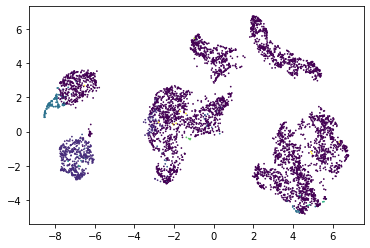

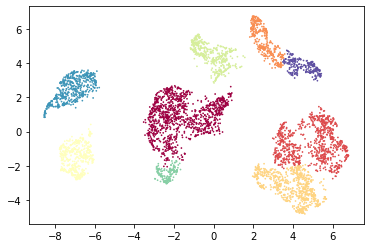

complete ----------------------------------------------------------------------------------------------------



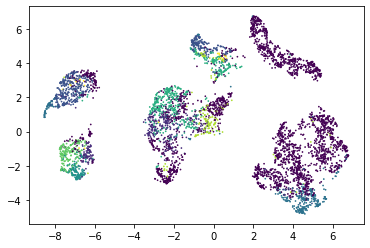

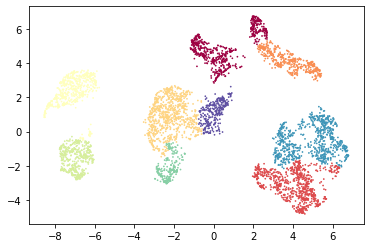

single ----------------------------------------------------------------------------------------------------



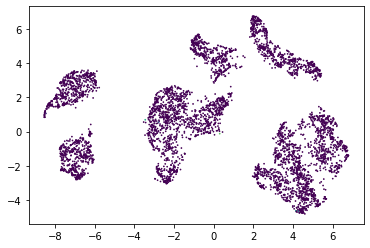

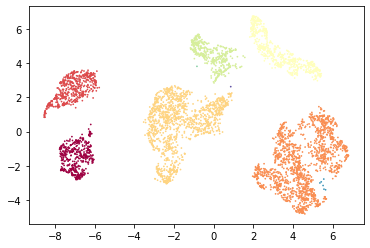

In [161]:
for linkage in ['average', 'complete', 'single']:
    print("{} {}\n".format(linkage, '-' * 100))
    agg = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage=linkage).fit(X_flat_normalized)
    plt.scatter(*umap.T, c=agg.labels_, s=0.5)
    plt.show();
    agg = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage=linkage).fit(umap)
    plt.scatter(*umap.T, c=agg.labels_, s=0.5, cmap='Spectral')
    plt.show();